In [18]:
# data science
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# INSPECTOR

# Create/connect inspector
inspector = inspect(engine)

# Get database table names
tables = inspector.get_table_names()

# Print table data
for table in tables: 
    print(table)

    columns = inspector.get_columns(table)
    for column in columns: 
        print(column["name"], column["type"])
    
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [4]:
# Generate Base class
base = automap_base()

# Reflect database tables
base.prepare(autoload_with = engine)

# View all classes automap found
print(list(base.classes))

[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [5]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [6]:
# Create our Python session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
query = """
        SELECT 
            max(date)
        FROM
            measurement;
        """

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())


[('2017-08-23',)]


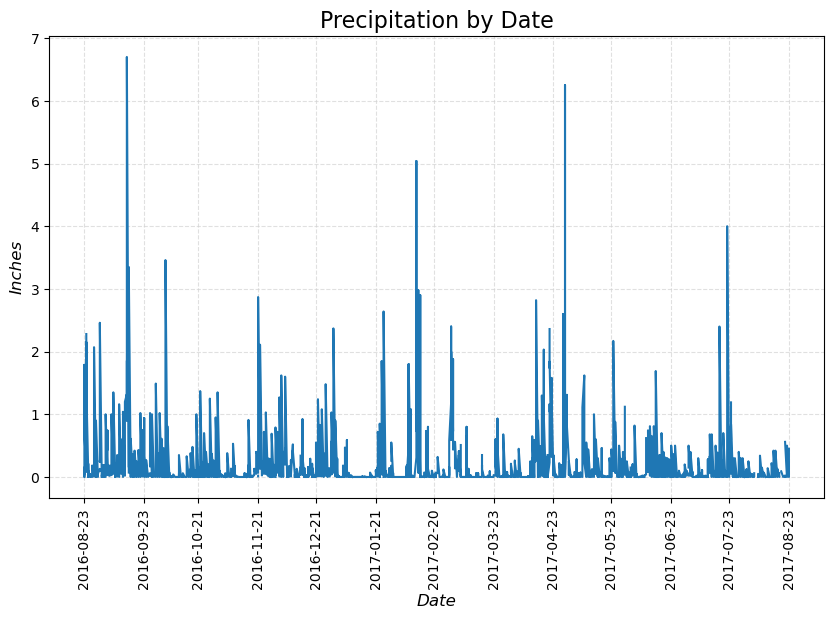

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query = """
        SELECT 
            date AS Date, 
            prcp AS Precipitation
        FROM 
            measurement
        WHERE 
            Date <= "2017-08-23" AND Date >= "2016-08-23"
        ORDER BY 
            Date ASC;
        """

# Create DataFrame
df = pd.read_sql(text(query), con = engine)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(df.Date, df.Precipitation)

plt.ylabel("Inches", fontsize=12, fontstyle="italic")
plt.xlabel("Date", fontsize=12, fontstyle="italic")
plt.title("Precipitation by Date", fontsize=16)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.7)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.7)

# From Canvas Xpert
plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))
plt.xticks(rotation=90)

plt.show()
df.head()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
query = """
        SELECT 
            COUNT(id)
        FROM
            station;
        """

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[(9,)]


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

query = """
        SELECT 
            station, 
            count(*) as num_rows
        FROM
            measurement
        GROUP BY
            station
        ORDER BY num_rows DESC;
        """
df = pd.read_sql(text(query), con=engine)
df

,station,num_rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query = """
        SELECT
            MIN(tobs) AS min_temp,
            MAX(tobs) AS max_temp,
            AVG(tobs) AS avg_temp
        FROM measurement
        WHERE station = "USC00519281"
        """

df = pd.read_sql(text(query), con=engine)
df


,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


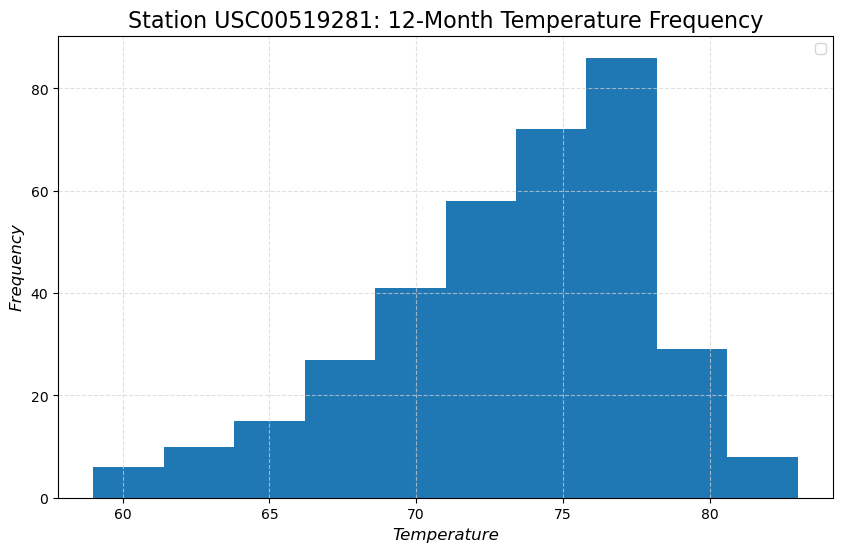

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = """
        SELECT
            date, 
            station,
            tobs
        FROM
            measurement
        WHERE 
            date >= "2016-08-23"
            AND station = "USC00519281"
        """

# Create DataFrame
df = pd.read_sql(text(query), con = engine)

# Plot results
plt.figure(figsize=(10,6))
plt.hist(df.tobs)

plt.ylabel("Frequency", fontsize=12, fontstyle="italic")
plt.xlabel("Temperature", fontsize=12, fontstyle="italic")
plt.title("Station USC00519281: 12-Month Temperature Frequency", fontsize=16)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.7)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.7)

plt.legend()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()